# Question 1


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import tensorflow as tf
from math import sqrt


## Data preprocessing


In [4]:
# read in the data
df = pd.read_csv("data/TrainData.csv")

# only want two first coloumns and the last one
df = df.iloc[:, [0, 1, 4]]
df.head()


,TIMESTAMP,POWER,WS10
0,20120101 1:00,0.273678,3.699120
1,20120101 2:00,0.086796,2.696797
2,20120101 3:00,0.006811,2.030140
3,20120101 4:00,0.018646,1.847362
4,20120101 5:00,0.034812,1.824698


In [5]:
# split the data into X and y
X = df["WS10"]
y = df["POWER"]
# y = pd.to_datetime(y, format="%Y%m%d %H:%M")

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# read test data
df_test = pd.read_csv("data/WeatherForecastInput.csv")
test_set = df_test["WS10"]
test_set = test_set.values.reshape(-1, 1)
test_set.shape


(720, 1)

In [16]:
# read in the solution
df_solution = pd.read_csv("data/Solution.csv")
df_solution.head()
solution_vector = df_solution["POWER"].values


## Linear regression (LR)


In [26]:
LR_model = LinearRegression()

# fit the model
LR_model.fit(X_train.values.reshape(-1, 1), y_train)

# make predictions
LR_y_pred = LR_model.predict(test_set)


Root Mean Squared Error(RMSE):  0.21650302369561153


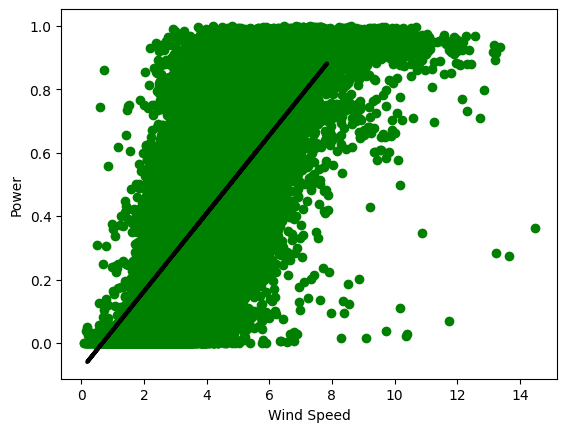

In [27]:
print(
    "Root Mean Squared Error(RMSE): ",
    sqrt(mean_squared_error(solution_vector, LR_y_pred)),
)

# plot the data
plt.scatter(X, y, color='green')
plt.plot(test_set, LR_y_pred, color="black", linewidth=3)
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.show()


## K-nearest neighbours (kNN)

In [33]:
knn_model = KNeighborsRegressor(n_neighbors=3)

# fit the model
knn_model.fit(X_train.values.reshape(-1, 1), y_train)

# make predictions
knn_y_pred = knn_model.predict(test_set)


Root Mean Squared Error(RMSE):  0.2552440586722348


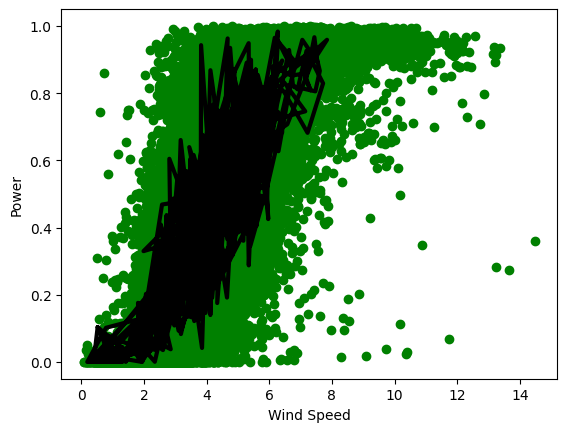

In [34]:
print("Root Mean Squared Error(RMSE): ", sqrt(mean_squared_error(solution_vector, knn_y_pred)))

# plot the data
plt.scatter(X, y, color='green')
plt.plot(test_set, knn_y_pred, color="black", linewidth=3)
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.show()


## Support vector regression (SVR)

In [45]:
svr_model = SVR(C=1.0, epsilon=0.2)

# fit the model
svr_model.fit(X_train.values.reshape(-1, 1), y_train)

# make predictions
svr_y_pred = svr_model.predict(test_set)


Root Mean Squared Error(RMSE):  0.22032473697847074


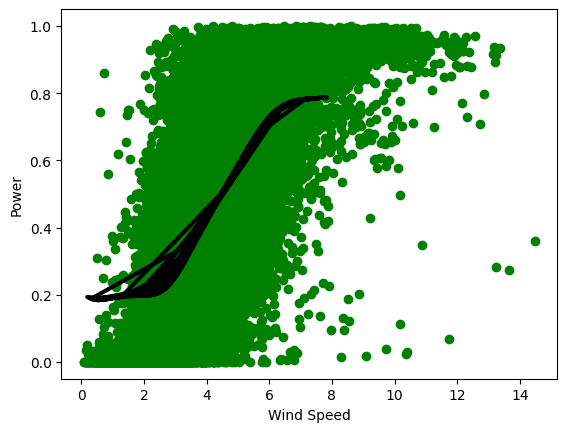

In [46]:
print("Root Mean Squared Error(RMSE): ", sqrt(mean_squared_error(solution_vector, svr_y_pred)))

# plot the data
plt.scatter(X, y, color='green')
plt.plot(test_set, svr_y_pred, color="black", linewidth=3)
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.show()


## Neural network (NN)

In [52]:
nn_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(1,)),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

# Compile the model
nn_model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
nn_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# make predictions
nn_y_pred = nn_model.predict(test_set)


Epoch 1/30
282/282 [==============================] - 3s 6ms/step - loss: 0.0560 - val_loss: 0.0543
Epoch 2/30
282/282 [==============================] - 1s 5ms/step - loss: 0.0552 - val_loss: 0.0620
Epoch 3/30
282/282 [==============================] - 1s 4ms/step - loss: 0.0556 - val_loss: 0.0538
Epoch 4/30
282/282 [==============================] - 1s 4ms/step - loss: 0.0539 - val_loss: 0.0504
Epoch 5/30
282/282 [==============================] - 1s 4ms/step - loss: 0.0526 - val_loss: 0.0496
Epoch 6/30
282/282 [==============================] - 1s 4ms/step - loss: 0.0519 - val_loss: 0.0502
Epoch 7/30
282/282 [==============================] - 1s 4ms/step - loss: 0.0511 - val_loss: 0.0491
Epoch 8/30
282/282 [==============================] - 1s 4ms/step - loss: 0.0513 - val_loss: 0.0510
Epoch 9/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0511 - val_loss: 0.0495
Epoch 10/30
282/282 [==============================] - 1s 3ms/step - loss: 0.0507 - val_loss: 0.0483

Root Mean Squared Error(RMSE):  0.21393330859105192


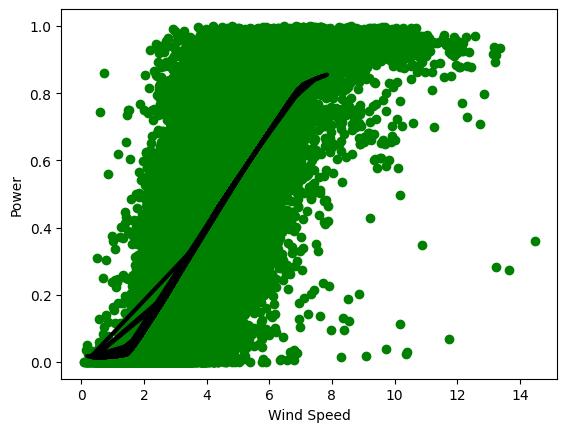

In [53]:
print("Root Mean Squared Error(RMSE): ", sqrt(mean_squared_error(solution_vector, nn_y_pred)))

# plot the data
plt.scatter(X, y, color='green')
plt.plot(test_set, nn_y_pred, color="black", linewidth=3)
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.show()


## Write forecasts to file

In [55]:
predictions = pd.DataFrame(
    {
        "LR": LR_y_pred.flatten(),
        "KNN": knn_y_pred.flatten(),
        "SVR": svr_y_pred.flatten(),
        "NN": nn_y_pred.flatten(),
    }
)

for model in predictions.columns:
    print(f"{model}: {sqrt(mean_squared_error(solution_vector, predictions[model]))}")
    template = pd.read_csv("data/ForecastTemplate.csv")
    template["POWER"] = predictions[model]
    template.to_csv(f"q1/ForecastTemplate1-{model}.csv", index=False)


LR: 0.21650302369561153
KNN: 0.2552440586722348
SVR: 0.22032473697847074
NN: 0.21393330859105192
